In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Chaitra.b.c\\Desktop\\Imarticus\\Machine Learning\\Projects\\ML project Datasets\\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop("id", axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

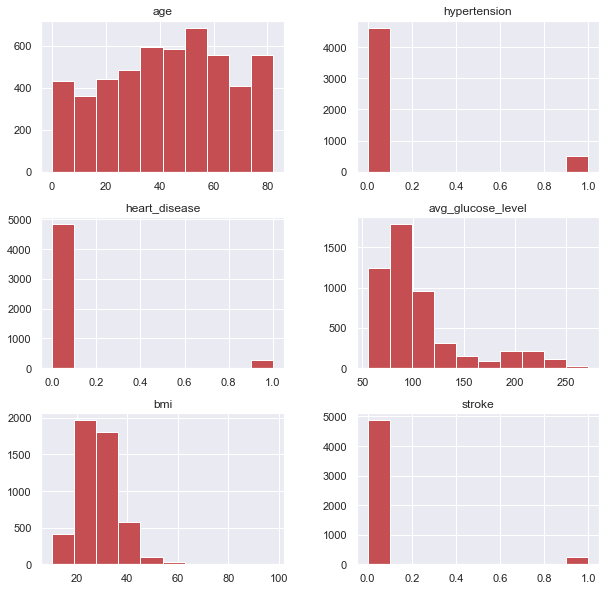

In [6]:
sns.set(rc = {"figure.figsize":(10,10)})
df.hist(color = 'r')

In [7]:
#___ Checking for missing values

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

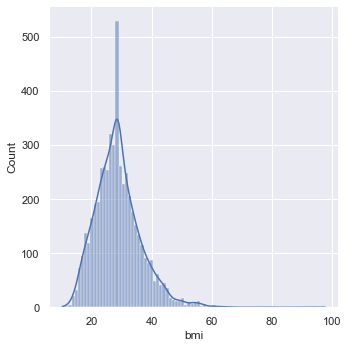

In [8]:
# MISSING VALUES Treatment

df["bmi"] = df["bmi"].fillna(df["bmi"].mean())
sns.displot(df["bmi"], kde = True)

In [9]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

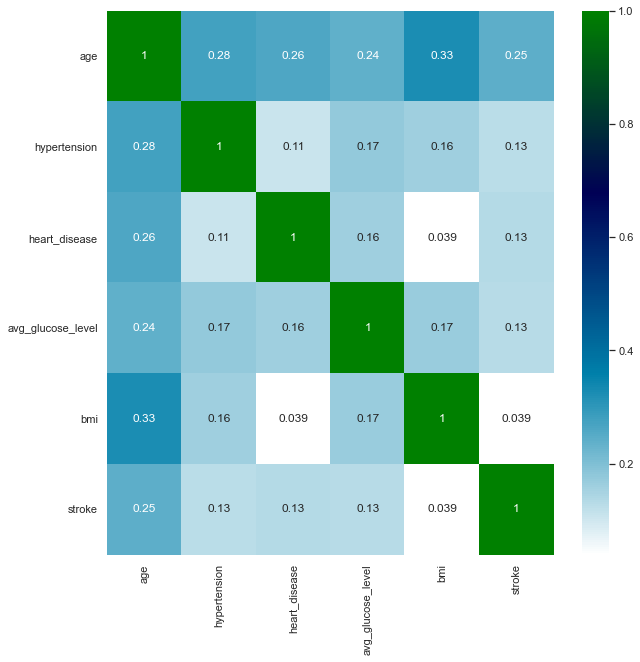

In [10]:
sns.heatmap(df.corr(), annot = True, cmap = "ocean_r")

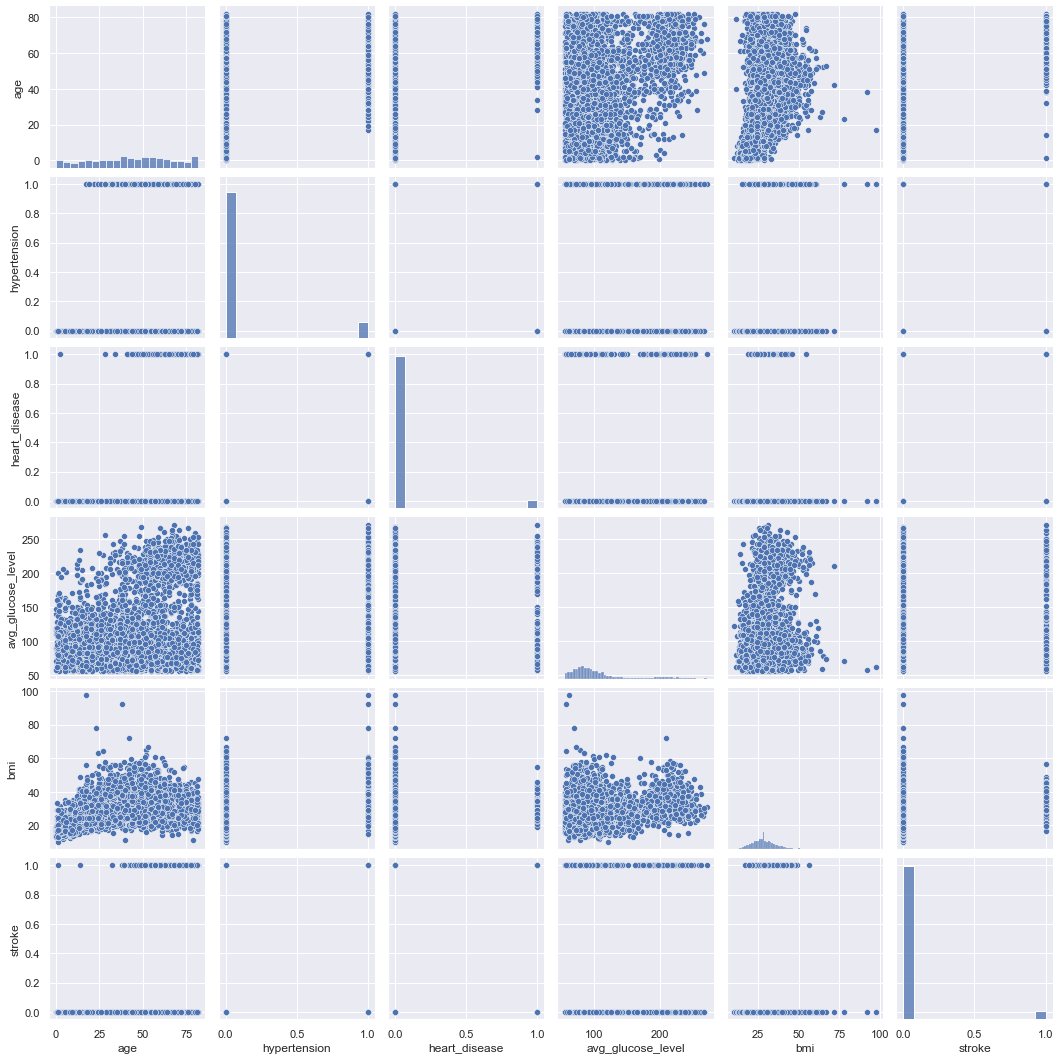

In [11]:
sns.pairplot(df)

### There dont seem to be any high correlation among the independent variables

In [12]:
# numerical variables and categorical variables

numerical_features = [i for i in df.columns if df[i].dtype != "object"]
print(numerical_features)

categorical_features = [i for i in df.columns if df[i].dtype == "object"]
print(categorical_features)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


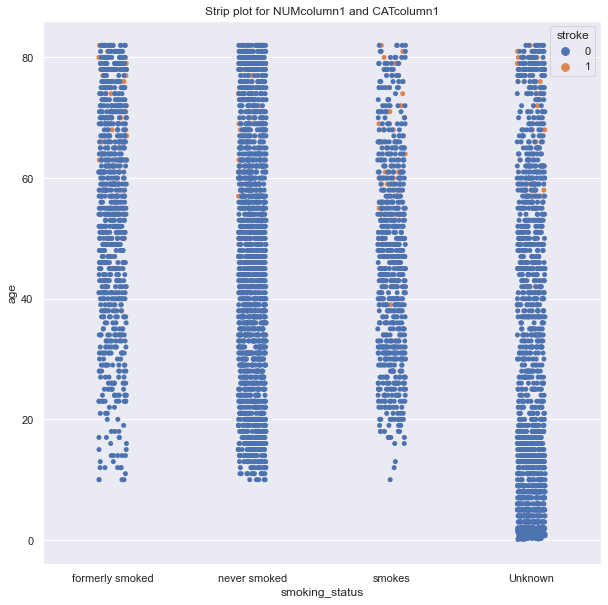

In [13]:
# stripplot 
sns.stripplot(x = 'smoking_status', y = 'age', hue = 'stroke', data = df)

plt.title('Strip plot for NUMcolumn1 and CATcolumn1')
plt.show()

In [14]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### The data is imbalanced with a huge difference, We need to resample the data and then train our model. for now we will make use of the available data and draw some insights.

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
Inter Quartile range:  36.0
Upper_outliers:  0
lower_outliers:  0


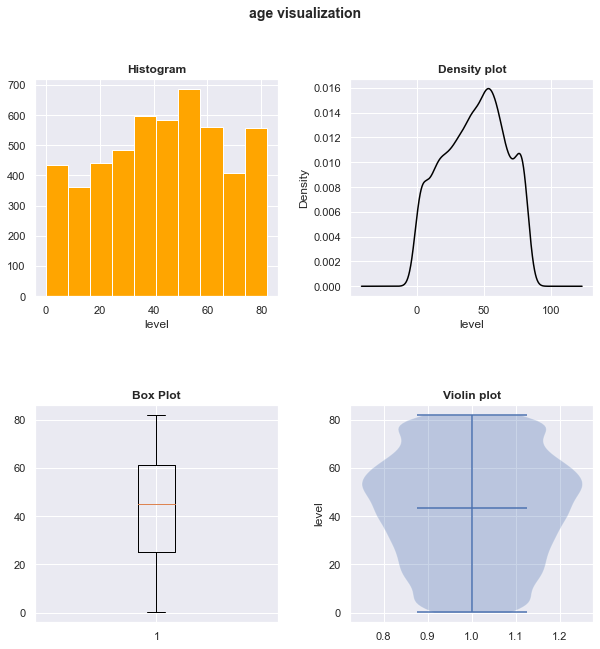

In [15]:
#AGE

i = 'age'
if i == 'age':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

In [16]:
# test of Normality
from scipy.stats import shapiro

stat, pvalue = shapiro(df.age)
print("Stat value: ",stat,"  pvalue: ",pvalue)

Stat value:  0.96723872423172   pvalue:  1.3734279099703845e-32


C:\Users\Chaitra.b.c\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
# As the N > 5000
from scipy.stats import anderson

stat, crit_val, sigLVL = anderson(df.age, dist = "norm")
print("\n Stat : ",stat,"\n critcal values: ",crit_val, "\n significance level: ",sigLVL)


 Stat :  33.85644306053291 
 critcal values:  [0.576 0.655 0.786 0.917 1.091] 
 significance level:  [15.  10.   5.   2.5  1. ]


### The Anderson Darling Test for normality has returned a higher stat value than any of the critical values ofr respective significance levels. there fore the age variable is not normally distributed.

In [18]:
from scipy.stats import boxcox

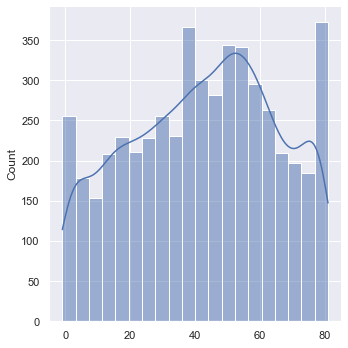

In [19]:
data = boxcox(df["age"],1)
sns.displot(data, kde = True)

### AVG Glucose lvl

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
Inter Quartile range:  36.845
Upper_outliers:  627
lower_outliers:  0


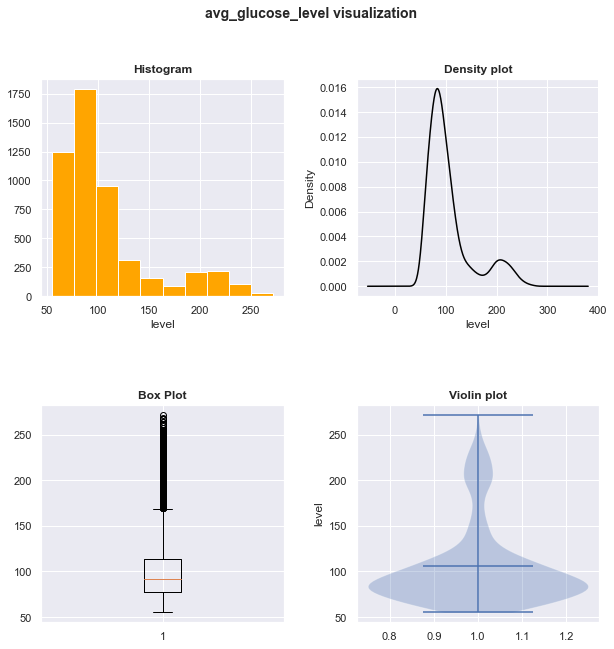

In [20]:
i = 'avg_glucose_level'
if i == 'avg_glucose_level':
    sns.set(rc = {'figure.figsize':(10,10)})
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle(f"{i} visualization", fontsize = 14, fontweight = 'bold')

    ax1.hist(df[i],color = 'orange')
    ax1.set_title("Histogram",fontweight = 'bold')
    ax1.set_xlabel("level")

    df[i].plot.density(ax = ax2,color = 'black')
    ax2.set_title("Density plot",fontweight = 'bold')
    ax2.set_xlabel("level")

    ax3.boxplot(df[i])
    ax3.set_title('Box Plot',fontweight = 'bold')
    
    ax4.violinplot(df[i],showmeans = True)
    ax4.set_title('Violin plot',fontweight = 'bold')
    ax4.set_ylabel("level")
    
    print(df[i].describe())
    
    IQR = df[i].describe()[6] - df[i].describe()[4]
    print("Inter Quartile range: ",IQR)
    
    upper_outliers = df[i][df[i] > df[i].describe()[6]+1.5*IQR].count()
    print("Upper_outliers: ",upper_outliers)

    lower_outliers = df[i][df[i] < df[i].describe()[4]-1.5*IQR].count()
    print("lower_outliers: ",lower_outliers)

<AxesSubplot:>

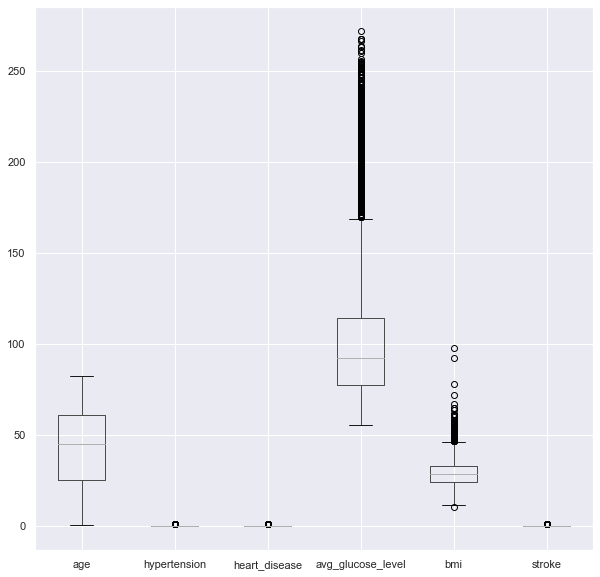

In [21]:
df.boxplot()

### Considerable number of outliers detected

In [22]:
# Outlier visualization
def outliers(df, numerical_features):
    """Count the number of outliers for each feature using the IQR"""
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in numerical_features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[i] < (Q1-1.5*IQR)) | (df[i] > (Q3+1.5*IQR))])
        rows = len(df[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': numerical_features
                               , 'Num_Outliers': num_outliers
                                , 'Percent_Outliers': pct_outliers
                                , 'IQR': interquartile_range
                               , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(df = df, numerical_features = numerical_features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
3,avg_glucose_level,627,0.122701,36.845,5110
1,hypertension,498,0.097456,0.000,5110
2,heart_disease,276,0.054012,0.000,5110
5,stroke,249,0.048728,0.000,5110
4,bmi,126,0.024658,9.000,5110
0,age,0,0.000000,36.000,5110


In [23]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [24]:
# treating outliers
from scipy import stats

columns = ["avg_glucose_level","bmi"]

for col in columns:
    iqr = stats.iqr(df[col])
    print("\nIQR of", col, ":",iqr)
    UL = df[col].quantile(0.75) + 1.5*iqr
    LL = df[col].quantile(0.25) - 1.5*iqr
    df[col] = np.where(df[col]>UL, UL,df[col])
    df[col] = np.where(df[col]<LL, LL, df[col])
    print("No. of Outliers in",col,":", (len(df[df[col] > UL]) + len(df[df[col] < LL])) )


IQR of avg_glucose_level : 36.845
No. of Outliers in avg_glucose_level : 0

IQR of bmi : 8.999999999999996
No. of Outliers in bmi : 0


<AxesSubplot:>

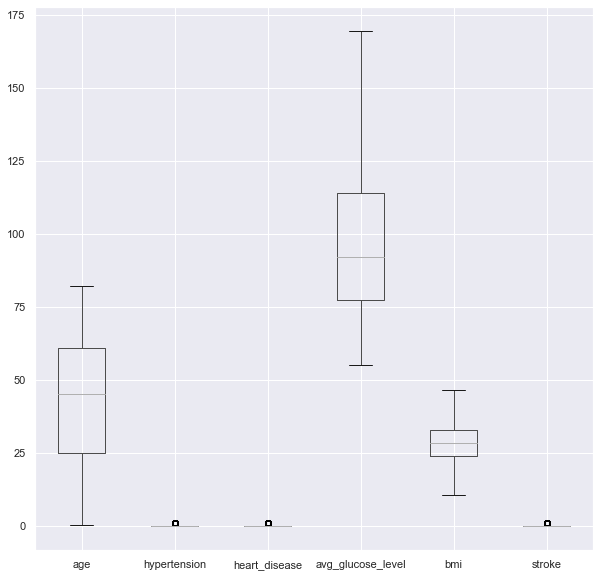

In [25]:
df.boxplot()

### Association test

In [26]:
#____ Checking their association
from scipy.stats import chi2, chi2_contingency
for i in categorical_features:
    if i != "satisfaction":
        print("-"*100)
        ct = pd.crosstab(df[i], df.stroke)
        print(ct)

        res = chi2_contingency(ct)
        print(res)

----------------------------------------------------------------------------------------------------
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0
(0.47258662884530234, 0.7895490538408245, 2, array([[2.84810841e+03, 1.45891585e+02],
       [2.01194031e+03, 1.03059687e+02],
       [9.51272016e-01, 4.87279843e-02]]))
----------------------------------------------------------------------------------------------------
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220
(58.923890259034195, 1.6389021142314745e-14, 1, array([[1671.38493151,   85.61506849],
       [3189.61506849,  163.38493151]]))
----------------------------------------------------------------------------------------------------
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2
(49.163511976675295, 5.397707801896119

### The test of association is showing that Residence_type and Gender has no statistically significant association with the dependent variable Stroke.

## Feature scaling

In [27]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [28]:
# Making a oversampled data and a undersapmled data
from sklearn.utils import resample

one_sample = df[df['stroke'] == 1]
zero_sample = df[df["stroke"] == 0]

# Oversampling

upsampled = resample(one_sample, replace = True,
                    n_samples = len(zero_sample), random_state = 42)

os_df = pd.concat([zero_sample, upsampled])

print(os_df.stroke.value_counts())


# Undersampling

undersampled = resample(zero_sample, replace = False,
                       n_samples = len(one_sample), random_state = 42)

us_df = pd.concat([one_sample, undersampled])

print(us_df.stroke.value_counts())


0    4861
1    4861
Name: stroke, dtype: int64
0    249
1    249
Name: stroke, dtype: int64


## Scaling both the dfs

In [29]:
os_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [30]:
os_dummies = pd.get_dummies(os_df['gender'], drop_first = True, prefix = 'gender')
us_dummies = pd.get_dummies(us_df['gender'], drop_first = True, prefix = 'gender')

print(os_dummies)

os_df = pd.concat([os_df,os_dummies], axis = 1)
us_df = pd.concat([us_df,us_dummies], axis = 1)

us_df.head()
#os_df['gender'] = os_df['gender'].replace(['Male','Female'],[1,0])
#us_df['gender'] = us_df['gender'].replace(['Male','Female'],[1,0])
#us_df.head()

     gender_Male  gender_Other
249            1             0
250            1             0
251            0             0
252            0             0
253            1             0
..           ...           ...
178            0             0
174            0             0
238            0             0
3              0             0
134            0             0

[9722 rows x 2 columns]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.600000,formerly smoked,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.893237,never smoked,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.500000,never smoked,1,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.400000,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.000000,never smoked,1,0


In [31]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [32]:
os_df['ever_married'] = os_df['ever_married'].replace(['Yes','No'],[1,0])
us_df['ever_married'] = us_df['ever_married'].replace(['Yes','No'],[1,0])
os_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
249,Male,3.0,0,0,0,children,Rural,95.12,18.0,Unknown,0,1,0
250,Male,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0,1,0
251,Female,8.0,0,0,0,Private,Urban,110.89,17.6,Unknown,0,0,0
252,Female,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0,0,0
253,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,Unknown,0,1,0


In [33]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [34]:
os_dummies = pd.get_dummies(os_df['work_type'], drop_first = True, prefix = 'work')
us_dummies = pd.get_dummies(us_df['work_type'], drop_first = True, prefix = 'work')

print(os_dummies)

os_df = pd.concat([os_df,os_dummies], axis = 1)
us_df = pd.concat([us_df, us_dummies], axis = 1)

us_df.head()

     work_Never_worked  work_Private  work_Self-employed  work_children
249                  0             0                   0              1
250                  0             1                   0              0
251                  0             1                   0              0
252                  0             1                   0              0
253                  1             0                   0              0
..                 ...           ...                 ...            ...
178                  0             0                   0              0
174                  0             0                   1              0
238                  0             1                   0              0
3                    0             1                   0              0
134                  0             0                   1              0

[9722 rows x 4 columns]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children
0,Male,67.0,0,1,1,Private,Urban,169.3575,36.600000,formerly smoked,1,1,0,1,0,0
1,Female,61.0,0,0,1,Self-employed,Rural,169.3575,28.893237,never smoked,1,0,0,0,1,0
2,Male,80.0,0,1,1,Private,Rural,105.9200,32.500000,never smoked,1,1,0,1,0,0
3,Female,49.0,0,0,1,Private,Urban,169.3575,34.400000,smokes,1,0,0,1,0,0
4,Female,79.0,1,0,1,Self-employed,Rural,169.3575,24.000000,never smoked,1,0,0,0,1,0


In [35]:
os_df['Residence_type'] = os_df['Residence_type'].replace(['Urban','Rural'],[1,0])
us_df['Residence_type'] = us_df['Residence_type'].replace(['Urban','Rural'],[1,0])
os_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,work_Never_worked,work_Private,work_Self-employed,work_children
249,Male,3.0,0,0,0,children,0,95.12,18.0,Unknown,0,1,0,0,0,0,1
250,Male,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,1,0,0,1,0,0
251,Female,8.0,0,0,0,Private,1,110.89,17.6,Unknown,0,0,0,0,1,0,0
252,Female,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0,0,0,1,0,0
253,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknown,0,1,0,1,0,0,0


In [36]:
os_dummies = pd.get_dummies(os_df['smoking_status'], drop_first = True, prefix = 'ss')
us_dummies = pd.get_dummies(us_df['smoking_status'], drop_first = True, prefix = 'ss')

print(os_dummies)

os_df = pd.concat([os_df,os_dummies], axis = 1)
us_df = pd.concat([us_df, us_dummies], axis = 1)

us_df.head()

     ss_formerly smoked  ss_never smoked  ss_smokes
249                   0                0          0
250                   0                1          0
251                   0                0          0
252                   1                0          0
253                   0                0          0
..                  ...              ...        ...
178                   0                0          0
174                   1                0          0
238                   0                1          0
3                     0                0          1
134                   0                1          0

[9722 rows x 3 columns]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children,ss_formerly smoked,ss_never smoked,ss_smokes
0,Male,67.0,0,1,1,Private,1,169.3575,36.600000,formerly smoked,1,1,0,1,0,0,1,0,0
1,Female,61.0,0,0,1,Self-employed,0,169.3575,28.893237,never smoked,1,0,0,0,1,0,0,1,0
2,Male,80.0,0,1,1,Private,0,105.9200,32.500000,never smoked,1,1,0,1,0,0,0,1,0
3,Female,49.0,0,0,1,Private,1,169.3575,34.400000,smokes,1,0,0,1,0,0,0,0,1
4,Female,79.0,1,0,1,Self-employed,0,169.3575,24.000000,never smoked,1,0,0,0,1,0,0,1,0


In [37]:
os_df.drop(["work_type","smoking_status"],axis =1, inplace = True)
us_df.drop(["work_type","smoking_status"],axis =1, inplace = True)

In [38]:
os_df.drop(["gender"],axis =1, inplace = True)
us_df.drop(["gender"],axis =1, inplace = True)

In [39]:
us_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,work_Never_worked,work_Private,work_Self-employed,work_children,ss_formerly smoked,ss_never smoked,ss_smokes
0,67.0,0,1,1,1,169.3575,36.600000,1,1,0,1,0,0,1,0,0
1,61.0,0,0,1,0,169.3575,28.893237,1,0,0,0,1,0,0,1,0
2,80.0,0,1,1,0,105.9200,32.500000,1,1,0,1,0,0,0,1,0
3,49.0,0,0,1,1,169.3575,34.400000,1,0,0,1,0,0,0,0,1
4,79.0,1,0,1,0,169.3575,24.000000,1,0,0,0,1,0,0,1,0


In [40]:
# SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

os_y = os_df["stroke"].copy()
us_y = us_df["stroke"].copy()

os_X = os_df.drop(["stroke"],axis = 1)
us_X = us_df.drop(["stroke"],axis = 1)



os_X = scale(os_X)
us_X = scale(us_X)

print(os_X)

[[-2.33464629 -0.46034468 -0.3729268  ... -0.53126964 -0.76211089
  -0.43868497]
 [ 0.13865355  2.17228532 -0.3729268  ... -0.53126964  1.31214501
  -0.43868497]
 [-2.10980085 -0.46034468 -0.3729268  ... -0.53126964 -0.76211089
  -0.43868497]
 ...
 [-0.17613007  2.17228532 -0.3729268  ... -0.53126964  1.31214501
  -0.43868497]
 [-0.26606824 -0.46034468 -0.3729268  ... -0.53126964 -0.76211089
   2.27954017]
 [ 0.58834443  2.17228532 -0.3729268  ... -0.53126964  1.31214501
  -0.43868497]]


In [41]:
us_y.shape

(498,)

In [42]:
os_columns = [i for i in os_df.columns if i != "stroke"]
us_columns = [i for i in us_df.columns if i != "stroke"]
print(os_columns,"\n",us_columns)

['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'work_Never_worked', 'work_Private', 'work_Self-employed', 'work_children', 'ss_formerly smoked', 'ss_never smoked', 'ss_smokes'] 
 ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'gender_Male', 'work_Never_worked', 'work_Private', 'work_Self-employed', 'work_children', 'ss_formerly smoked', 'ss_never smoked', 'ss_smokes']


In [43]:
oss_df = pd.DataFrame(os_X, columns = os_columns)
uss_df = pd.DataFrame(us_X, columns = us_columns)

oss_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_Never_worked,work_Private,work_Self-employed,work_children,ss_formerly smoked,ss_never smoked,ss_smokes
0,-2.334646,-0.460345,-0.372927,-1.792800,-1.058704,-0.357970,-1.763387,1.172721,-0.010142,-0.047624,-1.175944,-0.514842,3.525362,-0.531270,-0.762111,-0.438685
1,0.138654,2.172285,-0.372927,0.557787,0.944551,-0.544694,1.534404,1.172721,-0.010142,-0.047624,0.850381,-0.514842,-0.283659,-0.531270,1.312145,-0.438685
2,-2.109801,-0.460345,-0.372927,-1.792800,0.944551,0.053292,-1.825610,-0.852718,-0.010142,-0.047624,0.850381,-0.514842,-0.283659,-0.531270,-0.762111,-0.438685
3,0.678283,-0.460345,-0.372927,0.557787,-1.058704,-1.038104,1.021069,-0.852718,-0.010142,-0.047624,0.850381,-0.514842,-0.283659,1.882283,-0.762111,-0.438685
4,-1.839986,-0.460345,-0.372927,-1.792800,-1.058704,1.367401,-1.592275,1.172721,-0.010142,20.997835,-1.175944,-0.514842,-0.283659,-0.531270,-0.762111,-0.438685


# Model

In [44]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

##  kNN with Over sampled Dataframe

np.sqrt(oss_df.shape[0])

X_train, X_test, y_train, y_test = train_test_split(oss_df,os_y, test_size = 0.3, random_state = 42,
                                                   shuffle = True, stratify = os_y)

l_1 = []
l_0 = []

for i in range(1,200,1):
    
    knn = KNeighborsClassifier(n_neighbors = i)

    mpm_knn = knn.fit(X_train,y_train)
    
    score0 = mpm_knn.score(X_train,y_train)

    score1 = mpm_knn.score(X_test,y_test)
    
    l_1.append((i,score1))
    l_0.append((i,score0))

plt.plot(*zip(*l_1),label = 'test')
plt.plot(*zip(*l_0),label = 'train')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# Choosing the best kNN where there is overfitting
op_knn = KNeighborsClassifier(n_neighbors = 85)
knn = op_knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
score

y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

pd.crosstab(y_test,y_pred, margins =True, rownames = ["actual"], colnames = ["predicted"])

print(classification_report(y_test,y_pred))

# Predicited probablility
PredProb_knn = mpm_knn.predict_proba(X_test)[:,1]
PredProb_knn

fpr, tpr, thresholds = roc_curve(y_test, PredProb_knn)
fpr.shape

auc = roc_auc_score(y_test, PredProb_knn)

plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

## UnderSampled

In [45]:
X_train, X_test, y_train, y_test = train_test_split(uss_df,us_y, test_size = 0.3, random_state = 42,
                                                   shuffle = True, stratify = us_y)

In [46]:
l_1 = []
l_0 = []

In [47]:
for i in range(1,200,1):
    
    knn = KNeighborsClassifier(n_neighbors = i)

    mpm_knn = knn.fit(X_train,y_train)
    
    score0 = mpm_knn.score(X_train,y_train)

    score1 = mpm_knn.score(X_test,y_test)
    
    l_1.append((i,score1))
    l_0.append((i,score0))

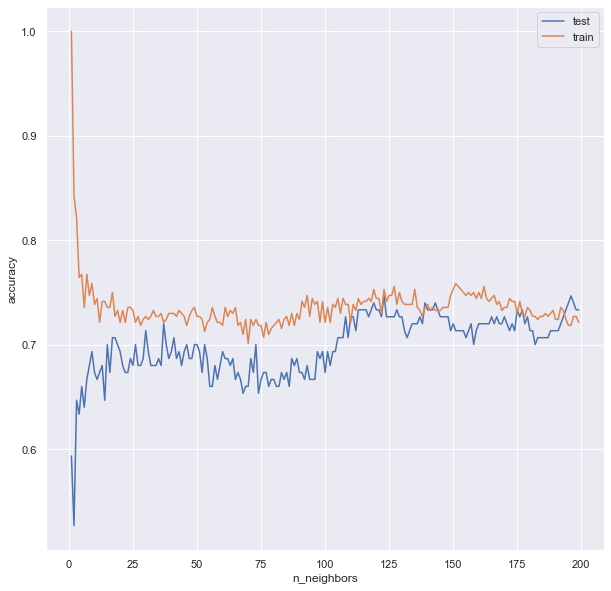

In [48]:
plt.plot(*zip(*l_1),label = 'test')
plt.plot(*zip(*l_0),label = 'train')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [49]:
# Choosing the best kNN where there is overlapping
op_knn = KNeighborsClassifier(n_neighbors = 143)
knn = op_knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
score

0.74

In [50]:
y_pred = knn.predict(X_test)

In [51]:
confusion_matrix(y_test,y_pred)

array([[50, 25],
       [14, 61]], dtype=int64)

In [52]:
pd.crosstab(y_test,y_pred, margins =True, rownames = ["actual"], colnames = ["predicted"])

predicted,0,1,All
actual,,,
0,50,25,75
1,14,61,75
All,64,86,150


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        75
           1       0.71      0.81      0.76        75

    accuracy                           0.74       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.74      0.74       150



In [54]:
# Predicited probablility
PredProb_knn = mpm_knn.predict_proba(X_test)[:,1]
PredProb_knn

array([0.53768844, 0.51256281, 0.42211055, 0.44221106, 0.55778894,
       0.48241206, 0.42211055, 0.44221106, 0.55276382, 0.61306533,
       0.51256281, 0.37688442, 0.54271357, 0.47738693, 0.48241206,
       0.47236181, 0.53266332, 0.37688442, 0.54271357, 0.48743719,
       0.54773869, 0.49748744, 0.54271357, 0.48241206, 0.45728643,
       0.47738693, 0.53266332, 0.54271357, 0.58291457, 0.42713568,
       0.46733668, 0.51256281, 0.4120603 , 0.54271357, 0.49246231,
       0.50251256, 0.45728643, 0.57286432, 0.53266332, 0.54773869,
       0.54271357, 0.59798995, 0.44723618, 0.54773869, 0.45226131,
       0.3718593 , 0.50753769, 0.44221106, 0.5879397 , 0.57788945,
       0.37688442, 0.5879397 , 0.51758794, 0.51256281, 0.48241206,
       0.45728643, 0.49246231, 0.45728643, 0.54271357, 0.53266332,
       0.55276382, 0.57286432, 0.56281407, 0.53266332, 0.45226131,
       0.58291457, 0.51256281, 0.54271357, 0.51256281, 0.55778894,
       0.52763819, 0.50753769, 0.46733668, 0.42713568, 0.34673

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, PredProb_knn)
fpr.shape

(41,)

In [56]:
auc = roc_auc_score(y_test, PredProb_knn)

Text(0.5, 1.0, 'RoC Curve')

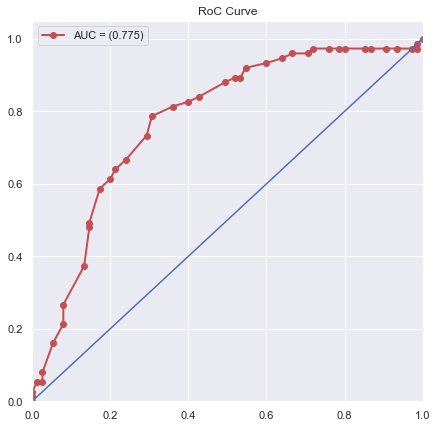

In [57]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

# SVC with oversampled dataframe


In [58]:
X_train, X_test, y_train, y_test = train_test_split(oss_df,os_y, test_size = 0.3, random_state = 42,
                                                   shuffle = True, stratify = os_y)

clf = SVC(probability = True)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1115,344,1459
1,130,1328,1458
All,1245,1672,2917


In [60]:
confusion_matrix(y_test,y_pred)

array([[1115,  344],
       [ 130, 1328]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1459
           1       0.79      0.91      0.85      1458

    accuracy                           0.84      2917
   macro avg       0.84      0.84      0.84      2917
weighted avg       0.84      0.84      0.84      2917



In [62]:
y_prb = clf.predict_proba(X_test)[:,-1]
y_prb

array([0.02392764, 0.91354978, 0.26954866, ..., 0.20067699, 0.0120085 ,
       0.04796692])

In [63]:
fpr, tpr, Thresholds = roc_curve(y_test, y_prb)
fpr.shape

(336,)

In [64]:
auc = roc_auc_score(y_test,y_prb)
auc

0.9057851037644402

Text(0.5, 1.0, 'RoC Curve')

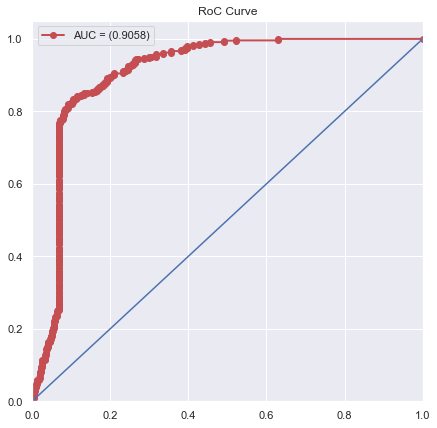

In [65]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

In [66]:
# Hyper parameter tuning
params = {'kernel':['poly','linear','rbf'],
         'C':[0.01,0.1,1,10,100],
         'gamma':[0.01,0.1]}
clf = SVC(probability =True)
#cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

svmGS = GridSearchCV(clf, param_grid = params, cv = 3,scoring = 'accuracy', verbose = 2, n_jobs = -1)

In [67]:
svmGS.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


KeyboardInterrupt: 

In [ ]:
svmGS.best_params_

In [ ]:
svmGS.best_score_

In [ ]:
y_pred = svmGS.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)


In [ ]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_prb = clf.predict_proba(X_test)[:,-1]
y_prb

In [ ]:
fpr, tpr, Thresholds = roc_curve(y_test, y_prb)
fpr.shape

In [ ]:
auc = roc_auc_score(y_test,y_prb)
auc

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

# Undersampled SVC

In [68]:
X_train, X_test, y_train, y_test = train_test_split(uss_df,us_y, test_size = 0.3, random_state = 42,
                                                   shuffle = True, stratify = us_y)

clf = SVC(probability = True)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [69]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,49,26,75
1,15,60,75
All,64,86,150


In [70]:
confusion_matrix(y_test,y_pred)

array([[49, 26],
       [15, 60]], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        75
           1       0.70      0.80      0.75        75

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



In [72]:
y_prb = clf.predict_proba(X_test)[:,-1]
y_prb

array([0.60635866, 0.83224892, 0.05943331, 0.02941865, 0.8789497 ,
       0.37779538, 0.05971531, 0.0766418 , 0.58044045, 0.7978495 ,
       0.58461056, 0.13713108, 0.83319942, 0.17835861, 0.37281113,
       0.82888101, 0.82108747, 0.15112501, 0.8624452 , 0.47934409,
       0.76104463, 0.5       , 0.30420133, 0.29805384, 0.62033151,
       0.67829047, 0.76564262, 0.82069042, 0.77590244, 0.08446298,
       0.33179567, 0.8606945 , 0.16714726, 0.8731026 , 0.14850216,
       0.5421719 , 0.4065804 , 0.82118591, 0.70310207, 0.6494646 ,
       0.75159188, 0.88404048, 0.10306495, 0.80052062, 0.09842831,
       0.13683793, 0.56305032, 0.06069153, 0.89649543, 0.43728308,
       0.13575211, 0.56064611, 0.20973112, 0.82334224, 0.34848272,
       0.2597639 , 0.22625979, 0.05943195, 0.47552447, 0.63805514,
       0.32086885, 0.8752242 , 0.75299509, 0.58570179, 0.44388114,
       0.89542646, 0.73945441, 0.44359786, 0.59251813, 0.70069418,
       0.71227998, 0.84445108, 0.42910003, 0.17066199, 0.15178

In [73]:
fpr, tpr, Thresholds = roc_curve(y_test, y_prb)
fpr.shape

(56,)

In [74]:
auc = roc_auc_score(y_test,y_prb)
auc

0.7853333333333333

Text(0.5, 1.0, 'RoC Curve')

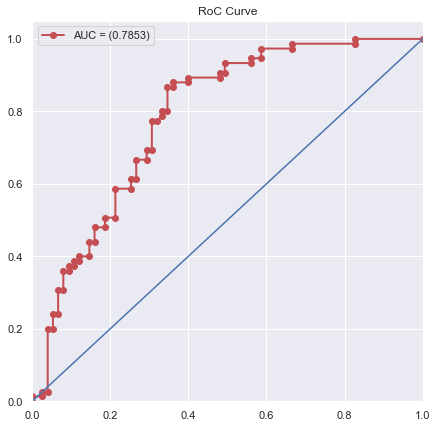

In [75]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")

In [76]:
params = {'kernel':['poly','linear','rbf'],
         'C':[0.01,0.1,1,10,100,1000],
         'gamma':[0.01,0.1]}
clf = SVC()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

svmGS = GridSearchCV(clf, param_grid = params, cv = 3,scoring = 'accuracy', verbose = 1, n_jobs = -1, refit = True)

In [77]:
svmGS.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1],
                         'kernel': ['poly', 'linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [78]:
svmGS.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [79]:
svmGS.best_score_

0.7758620689655172

In [80]:
clf = SVC(C = 0.1,gamma = 0.01, kernel = 'linear', probability =  True)
clf.fit(X_train,y_train)

SVC(C=0.1, gamma=0.01, kernel='linear', probability=True)

In [81]:
y_pred = svmGS.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [82]:
pd.crosstab(y_test,y_pred, rownames = ['acutal'], colnames = ['predicted'], margins =True)

predicted,0,1,All
acutal,,,
0,51,24,75
1,14,61,75
All,65,85,150


In [83]:
confusion_matrix(y_test, y_pred)

array([[51, 24],
       [14, 61]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        75
           1       0.72      0.81      0.76        75

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.75      0.75      0.75       150



In [85]:
accuracy_score(y_test,y_pred)

0.7466666666666667

In [86]:
y_prb = clf.predict_proba(X_test)[:,1]
y_prb

array([0.68334147, 0.62512925, 0.07684221, 0.0662418 , 0.8949357 ,
       0.22977254, 0.04409783, 0.06278859, 0.77120027, 0.84628752,
       0.45156648, 0.01522803, 0.8435653 , 0.27599362, 0.28025864,
       0.68940396, 0.86423509, 0.02820764, 0.80587512, 0.5713648 ,
       0.79569425, 0.37021976, 0.64704056, 0.24278166, 0.41565358,
       0.36814641, 0.79797287, 0.83372052, 0.86976295, 0.13257511,
       0.21275369, 0.75390534, 0.14472942, 0.80334062, 0.22506671,
       0.55160357, 0.4137076 , 0.84335517, 0.7624739 , 0.83236826,
       0.73715516, 0.92752052, 0.13333783, 0.72716717, 0.13894671,
       0.01643323, 0.55879337, 0.06155554, 0.89049139, 0.79709921,
       0.01264572, 0.84726245, 0.34089287, 0.81186657, 0.27376875,
       0.26436617, 0.33857541, 0.11498936, 0.65888122, 0.37876797,
       0.66241569, 0.92516741, 0.80796728, 0.64710491, 0.57553633,
       0.85172937, 0.70936137, 0.61934729, 0.65070282, 0.65298651,
       0.75972975, 0.79526102, 0.47515894, 0.1415015 , 0.01072

In [87]:
fpr, tpr, thresholds = roc_curve(y_test,y_prb)
fpr.shape

(56,)

In [88]:
auc = roc_auc_score(y_test,y_prb)
auc

0.7934222222222223

Text(0.5, 1.0, 'RoC Curve')

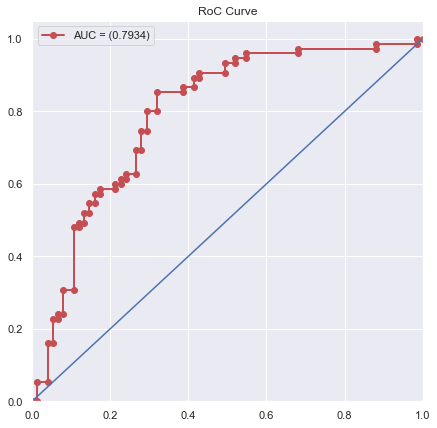

In [89]:
plt.figure(figsize = (7,7))
plt.plot(fpr,tpr, lw = 2, marker = 'o',color = "r", label = "AUC = ({0})".format(round(auc,4)))
plt.plot([0,1],marker ="_",color = "b")
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.legend()
plt.title("RoC Curve")